In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [30]:
output_dir = 'plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [31]:
df = pd.read_csv('plant_sensors.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['soil_moisture'] = df['soil_moisture'].interpolate(method='linear')
df = df.dropna(subset=['sensor_id', 'timestamp'])

In [32]:
print("=== Standard Deviation Analysis ===")
std_by_sensor = df.groupby('sensor_id')['soil_moisture'].std()
print(std_by_sensor)

=== Standard Deviation Analysis ===
sensor_id
A-1     8.609259
A-2     8.648869
B-1    17.415259
B-2     8.376222
C-1     8.629347
Name: soil_moisture, dtype: float64


In [33]:
print("\n=== Descriptive Statistics ===")
desc_stats = df.groupby('sensor_id')['soil_moisture'].describe()
print(desc_stats)



=== Descriptive Statistics ===
           count       mean        std    min       25%    50%      75%    max
sensor_id                                                                     
A-1        719.0  39.827705   8.609259  23.93  33.11000  38.37  45.0700  63.58
A-2        717.0  39.907887   8.648869  22.02  33.09000  38.33  44.9900  63.19
B-1        714.0  44.706667  17.415259  22.40  33.72625  39.22  48.3525  96.68
B-2        719.0  40.032399   8.376222  24.54  33.78000  38.43  45.5600  65.71
C-1        721.0  40.050069   8.629347  23.57  33.56000  38.07  45.3100  65.25


<Figure size 1000x600 with 0 Axes>

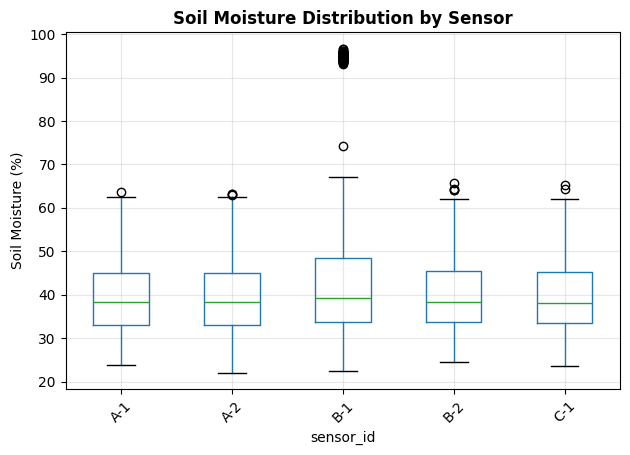

In [34]:
plt.figure(figsize=(10, 6))
df.boxplot(column='soil_moisture', by='sensor_id')
plt.title('Soil Moisture Distribution by Sensor', fontweight='bold')
plt.suptitle('')  
plt.ylabel('Soil Moisture (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'{output_dir}/final_challenge_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

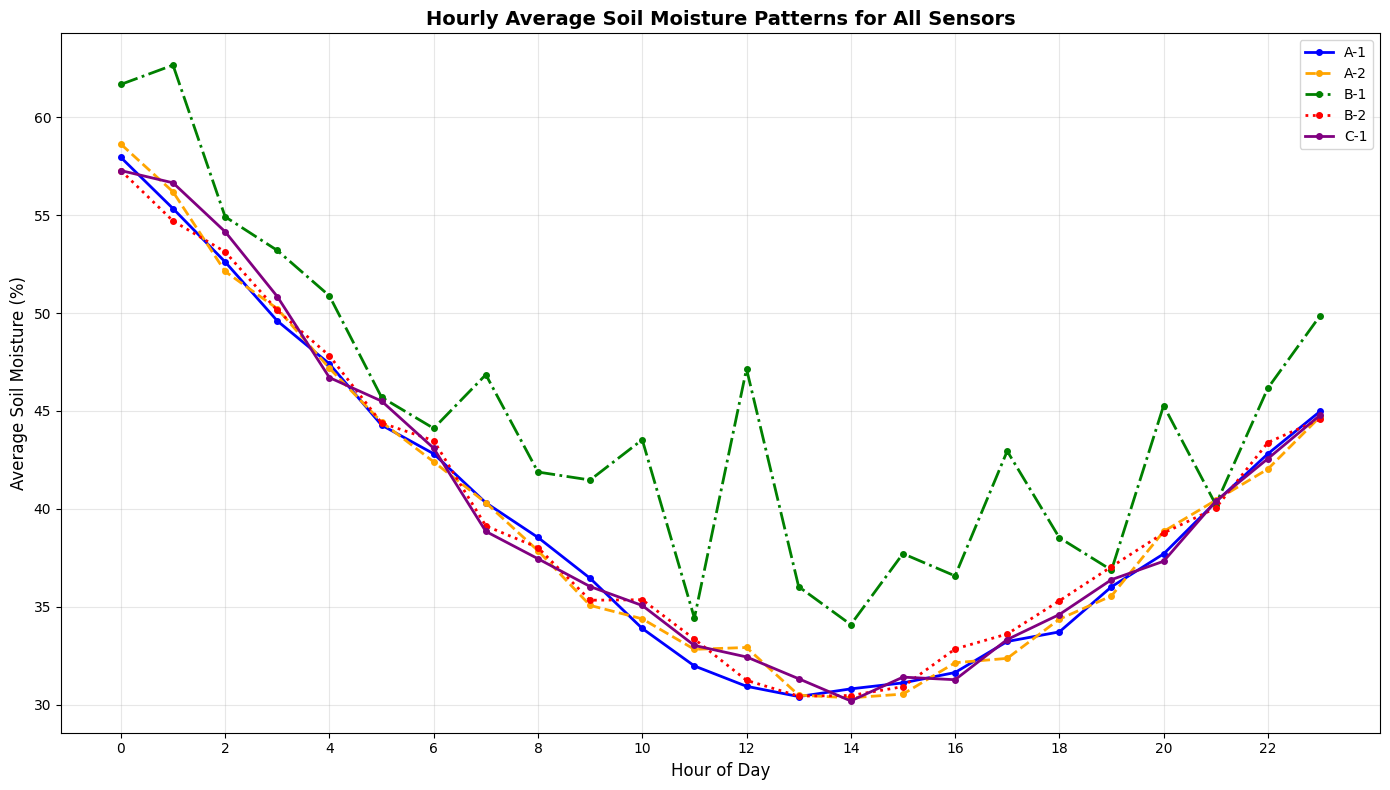

In [35]:
plt.figure(figsize=(14, 8))
colors = ['blue', 'orange', 'green', 'red', 'purple']
line_styles = ['-', '--', '-.', ':', '-']

for i, sensor in enumerate(df['sensor_id'].unique()):
    sensor_data = df[df['sensor_id'] == sensor]
    hourly_avg = sensor_data.groupby(sensor_data['timestamp'].dt.hour)['soil_moisture'].mean()
    plt.plot(hourly_avg.index, hourly_avg.values, 
             label=sensor, color=colors[i], linestyle=line_styles[i], 
             linewidth=2, marker='o', markersize=4)

plt.title('Hourly Average Soil Moisture Patterns for All Sensors', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average Soil Moisture (%)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24, 2))
plt.tight_layout()
plt.savefig(f'{output_dir}/final_challenge_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()


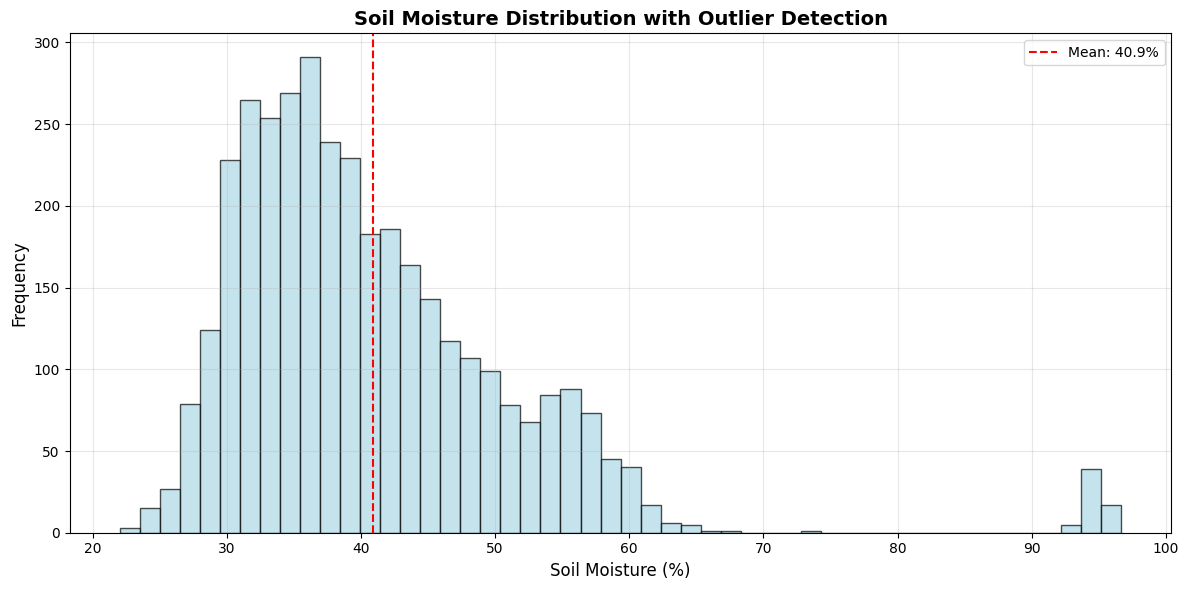


All analysis plots saved to 'plots/' directory


In [36]:
plt.figure(figsize=(12, 6))

from scipy import stats
z_scores = np.abs(stats.zscore(df['soil_moisture'].dropna()))
outliers = df['soil_moisture'].iloc[np.where(z_scores > 3)]

plt.hist(df['soil_moisture'], bins=50, color='lightblue', alpha=0.7, edgecolor='black')
plt.axvline(df['soil_moisture'].mean(), color='red', linestyle='--', 
           label=f'Mean: {df["soil_moisture"].mean():.1f}%')
plt.title('Soil Moisture Distribution with Outlier Detection', fontsize=14, fontweight='bold')
plt.xlabel('Soil Moisture (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'{output_dir}/final_challenge_outliers.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nAll analysis plots saved to '{output_dir}/' directory")